### Reproducing the tables and plots in our paper (simulation)

#### A quick look at the simulated data

In [2]:
from utility import boundary_map_convex, boundary_map_nonconvex, radius_map_convex, radius_map_nonconvex
import numpy as np

def criterion(Y, shape): # indicator of whether in R_1
    N, y_dim = Y.shape

    if shape == 0:
        return (Y > boundary_map_convex[y_dim]).all(axis=1)
    
    if shape == 1:
        return (Y < boundary_map_nonconvex[y_dim]).any(axis=1)
    
    if shape == 2:
        return np.linalg.norm(Y - np.ones_like(Y) * 2, axis=1) < radius_map_convex[y_dim]
    
    if shape == 3:
        # center is (2, 2, ..., 2)
        return np.linalg.norm(Y - np.ones_like(Y) * 2, axis=1) > radius_map_nonconvex[y_dim]

In [6]:
from utility import gen_data_kd

setting = 1
ydim = 30
shape = 0

X, Y = gen_data_kd(setting, ydim, 1000, 0.5, 0.1, 10)

# what is the percentage of desirable samples?
print(np.sum(criterion(Y, shape)) / 1000)

0.214


#### Printing the Tables

##### Sec 5.2

In [49]:
import numpy as np
import pandas as pd

all_df = pd.DataFrame()

shape = 0 # for table 1 and Table 2
# shape = 2 # for table 3 and Table 4

ydim = 30

pd.set_option('display.max_columns', None)

for s in range(1, 7):
    all_df1 = pd.DataFrame()
    for seed in range(1, 101, 10):
        df = pd.read_csv(f"dist_results\\ntrain=1000, ncalib=1000\\MCS, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain=1000, ncalib=1000, seed={seed}_{seed+9}.csv")
        all_df1 = pd.concat((all_df1, df))
        all_df1 = all_df1.groupby(['model', 'q'], as_index=False).mean()
    df1 = all_df1[all_df1['q'] == 0.3]

    all_df2 = pd.DataFrame()
    for seed in range(1, 101, 2):
        df2 = pd.read_csv(f"learn_results\\ntrain_f=800\\DL_s, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain_f=800, ncalib=100, seed={seed}_{seed+1}.csv")
        all_df2 = pd.concat((all_df2, df2))
        all_df2 = all_df2.groupby(['model', 'q'], as_index=False).mean()
    df2 = all_df2[all_df2['q'] == 0.3]
    df2 = all_df2[['DL_FDP', 'DL_power']]

    res = pd.concat((df1, df2), axis=1)
    all_df = pd.concat((all_df, res))

all_df = all_df.drop(columns='Unnamed: 0')
all_df

,model,q,MCS_FDP,MCS_power,Binary_FDP,Binary_power,setting,shape,xdim,ydim,seed,ntest,ntrain,ncalib,Intersect_FDP,Intersect_power,Intersect_corr_FDP,Intersect_corr_power,Intersect_valid_FDP,Intersect_valid_power,DL_FDP,DL_power
0,svm,0.3,0.269917,0.450398,0.243192,0.311041,1.0,0.0,10.0,30.0,94.5,100.0,1000.0,1000.0,0.797389,1.0,0.0,0.0,0.324355,0.406749,0.076194,0.099081
0,svm,0.3,0.254676,0.090763,0.222399,0.064278,2.0,0.0,10.0,30.0,94.5,100.0,1000.0,1000.0,0.807997,1.0,0.0,0.0,0.138575,0.015548,0.048622,0.012455
0,svm,0.3,0.270966,0.081147,0.224288,0.063099,3.0,0.0,10.0,30.0,94.5,100.0,1000.0,1000.0,0.728309,1.0,0.0,0.0,0.056835,0.027612,0.090360,0.040878
0,svm,0.3,0.366712,0.431953,0.356200,0.291715,4.0,0.0,10.0,30.0,94.5,100.0,1000.0,1000.0,0.789891,1.0,0.0,0.0,0.350668,0.119174,0.428255,0.167315
0,svm,0.3,0.436174,0.079175,0.326334,0.032496,5.0,0.0,10.0,30.0,94.5,100.0,1000.0,1000.0,0.797841,1.0,0.0,0.0,0.450760,0.005312,0.254335,0.055821
0,svm,0.3,0.337432,0.086543,0.266077,0.044841,6.0,0.0,10.0,30.0,94.5,100.0,1000.0,1000.0,0.777132,1.0,0.0,0.0,0.565970,0.241599,0.052816,0.016205


##### Section C.2.1

In [ ]:
import numpy as np
import pandas as pd

all_df = pd.DataFrame()

shape = 0 # for table 7 and 8 (task 1)
shape = 2 # for table 7 and 8 (task 2)

ydim = 30

pd.set_option('display.max_columns', None)

for s in range(1, 7):
    all_df1 = pd.DataFrame()
    for seed in range(1, 101, 10):
        df = pd.read_csv(f"dist_results\\score_comp\\MCS, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain=1000, ncalib=1000, seed={seed}_{seed+9}.csv")
        all_df1 = pd.concat((all_df1, df))
    all_df1 = all_df1.groupby(['model', 'q'], as_index=False).mean()
    df1 = all_df1[all_df1['q'] == 0.3]
    all_df = pd.concat((all_df, df1))

all_df = all_df[['MCS_FDP', 'MCS_power', 'MCS_alt_FDP', 'MCS_alt_power']]
all_df

,MCS_FDP,MCS_power,MCS_alt_FDP,MCS_alt_power
0,0.264560,0.759597,0.102372,0.440012
0,0.263242,0.404552,0.126773,0.207897
0,0.223398,0.134121,0.149551,0.074699
0,0.286180,0.332942,0.225762,0.221780
0,0.291177,0.170490,0.240211,0.092829
0,0.282856,0.062666,0.220043,0.048139


##### Section C.2.2

In [ ]:
import numpy as np
import pandas as pd

all_df = pd.DataFrame()

shape = 0 # for table 9 and 10 (task 1)
shape = 2 # for table 9 and 10 (task 2)

s = 3

pd.set_option('display.max_columns', None)

for ydim in [2, 5, 10]:
    all_df1 = pd.DataFrame()
    for seed in range(1, 101, 10):
        df = pd.read_csv(f"dist_results\\other_dim\\MCS, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain=1000, ncalib=1000, seed={seed}_{seed+9}.csv")
        all_df1 = pd.concat((all_df1, df))
    all_df1 = all_df1.groupby(['model', 'q'], as_index=False).mean()
    df1 = all_df1[all_df1['q'] == 0.3]

    all_df2 = pd.DataFrame()
    for seed in range(1, 101, 2):
        df2 = pd.read_csv(f"learn_results\\other_dim\\DL_s, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain_f=800, ncalib=100, seed={seed}_{seed+1}.csv")
        all_df2 = pd.concat((all_df2, df2))
    all_df2 = all_df2.groupby(['model', 'q'], as_index=False).mean()
    df2 = all_df2[all_df2['q'] == 0.3]
    df2 = all_df2[['DL_FDP', 'DL_power']]

    res = pd.concat((df1, df2), axis=1)
    all_df = pd.concat((all_df, res))

all_df = all_df.drop(columns='Unnamed: 0')
all_df

,model,q,MCS_FDP,MCS_power,Binary_FDP,Binary_power,setting,shape,xdim,ydim,seed,ntest,ntrain,ncalib,DL_FDP,DL_power
0,svm,0.3,0.298793,0.068323,0.269962,0.050388,3.0,2.0,10.0,2.0,50.5,100.0,1000.0,1000.0,0.301503,0.069080
0,svm,0.3,0.289979,0.057310,0.245564,0.050077,3.0,2.0,10.0,5.0,50.5,100.0,1000.0,1000.0,0.302169,0.071771
0,svm,0.3,0.264561,0.068913,0.256574,0.062586,3.0,2.0,10.0,10.0,50.5,100.0,1000.0,1000.0,0.310523,0.105680


##### Section C.2.3

In [11]:
import numpy as np
import pandas as pd

all_df = pd.DataFrame()

shape = 1 # for table 12 and 13 (task 3)
shape = 3 # for table 12 and 13 (task 4)

ydim = 30

pd.set_option('display.max_columns', None)

for s in range(1, 7):
    all_df1 = pd.DataFrame()
    for seed in range(1, 101, 10):
        df = pd.read_csv(f"dist_results\\ntrain=1000, ncalib=1000\\MCS, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain=1000, ncalib=1000, seed={seed}_{seed+9}.csv")
        all_df1 = pd.concat((all_df1, df))
    all_df1 = all_df1.groupby(['model', 'q'], as_index=False).mean()
    df1 = all_df1[all_df1['q'] == 0.3]

    all_df2 = pd.DataFrame()
    for seed in range(1, 101, 2):
        df2 = pd.read_csv(f"learn_results\\ntrain_f=800\\DL_s, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain_f=800, ncalib=100, seed={seed}_{seed+1}.csv")
        all_df2 = pd.concat((all_df2, df2))
    all_df2 = all_df2.groupby(['model', 'q'], as_index=False).mean()
    df2 = all_df2[all_df2['q'] == 0.3]
    df2 = all_df2[['DL_FDP', 'DL_power']]

    res = pd.concat((df1, df2), axis=1)
    all_df = pd.concat((all_df, res))

all_df = all_df.drop(columns='Unnamed: 0')
all_df

,model,q,MCS_FDP,MCS_power,Binary_FDP,Binary_power,setting,shape,xdim,ydim,seed,ntest,ntrain,ncalib,DL_FDP,DL_power
0,svm,0.3,0.298302,0.310545,0.327263,0.763381,1.0,3.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.303692,0.554675
0,svm,0.3,0.270682,0.014837,0.381135,0.098384,2.0,3.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.285722,0.089379
0,svm,0.3,0.275844,0.011846,0.385250,0.042594,3.0,3.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.275048,0.043732
0,svm,0.3,0.297689,0.233414,0.297729,0.588954,4.0,3.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.280413,0.446330
0,svm,0.3,0.288319,0.017360,0.304788,0.113551,5.0,3.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.312581,0.117006
0,svm,0.3,0.263128,0.016357,0.335285,0.036421,6.0,3.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.264939,0.062761


##### Section C.2.4

In [ ]:
import numpy as np
import pandas as pd

all_df = pd.DataFrame()

shape = 0 # for table 1 and Table 2
shape = 2 # for table 3 and Table 4

ydim = 30

pd.set_option('display.max_columns', None)

for s in range(1, 7):
    all_df1 = pd.DataFrame()
    for seed in range(1, 101, 10):
        df = pd.read_csv(f"dist_results\\linear_mu\\MCS, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=1, ntest=100, ntrain=1000, ncalib=1000, seed={seed}_{seed+9}.csv")
        all_df1 = pd.concat((all_df1, df))
    all_df1 = all_df1.groupby(['model', 'q'], as_index=False).mean()
    df1 = all_df1[all_df1['q'] == 0.3]

    all_df2 = pd.DataFrame()
    for seed in range(1, 101, 2):
        df2 = pd.read_csv(f"learn_results\\linear_mu\\DL_s, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=1, ntest=100, ntrain_f=800, ncalib=100, seed={seed}_{seed+1}, family=3.csv")
        all_df2 = pd.concat((all_df2, df2))
    all_df2 = all_df2.groupby(['model', 'q'], as_index=False).mean()
    df2 = all_df2[all_df2['q'] == 0.3]
    df2 = all_df2[['DL_FDP', 'DL_power']]

    res = pd.concat((df1, df2), axis=1)
    all_df = pd.concat((all_df, res))

all_df = all_df.drop(columns='Unnamed: 0')
all_df

,model,q,MCS_FDP,MCS_power,MCS_alt_FDP,MCS_alt_power,Binary_FDP,Binary_power,setting,shape,xdim,ydim,seed,ntest,ntrain,ncalib,DL_FDP,DL_power
0,linear,0.3,0.272902,0.842184,0.083387,0.489219,0.257467,0.063039,1.0,2.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.276214,0.583071
0,linear,0.3,0.221640,0.336860,0.128529,0.180284,0.245078,0.385586,2.0,2.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.274611,0.419084
0,linear,0.3,0.222562,0.137872,0.156702,0.103061,0.231688,0.128705,3.0,2.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.285669,0.147845
0,linear,0.3,0.286422,0.408345,0.198833,0.207369,0.307052,0.040068,4.0,2.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.260011,0.187792
0,linear,0.3,0.298308,0.135030,0.259965,0.089191,0.272770,0.176283,5.0,2.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.285426,0.162187
0,linear,0.3,0.267296,0.056399,0.246536,0.041911,0.291765,0.056190,6.0,2.0,10.0,30.0,50.5,100.0,1000.0,1000.0,0.279206,0.072797


##### Section C.2.5

In [20]:
import numpy as np
import pandas as pd

all_df = pd.DataFrame()

shape = 0 # for table 14 and 15 (task 1)
shape = 2 # for table 14 and 15 (task 2)

ydim = 30

pd.set_option('display.max_columns', None)

for s in range(1, 7):
    all_df2 = pd.DataFrame()
    for seed in range(1, 101, 2):
        df2 = pd.read_csv(f"learn_results\\loss_comp\\DL_m, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain_f=800, ncalib=100, seed={seed}_{seed+1}.csv")
        all_df2 = pd.concat((all_df2, df2))
    all_df2 = all_df2.groupby(['model', 'q'], as_index=False).mean()
    df2 = all_df2[all_df2['q'] == 0.3]
    df2 = all_df2[['DL_FDP', 'DL_power']]

    all_df = pd.concat((all_df, df2))

all_df

,DL_FDP,DL_power
0,0.276359,0.050900
0,0.278107,0.110937
0,0.331320,0.041206
0,0.279995,0.019347
0,0.278008,0.041378
0,0.360632,0.031836


##### Section C.2.6

In [1]:
import numpy as np
import pandas as pd

all_df = pd.DataFrame()

shape = 0
shape = 2

s = 3
ydim = 30

pd.set_option('display.max_columns', None)

for family in range(1, 6):
    all_df1 = pd.DataFrame()
    for seed in range(1, 101, 2):
        df = pd.read_csv(f"learn_results\\family_comp, M=1000\\DL_s, setting={s}, shape={shape}, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain_f=800, ncalib=100, seed={seed}_{seed+1}, family={family}.csv")
        all_df1 = pd.concat((all_df1, df))
    all_df1 = all_df1.groupby(['model', 'q'], as_index=False).mean()
    df1 = all_df1[all_df1['q'] == 0.3]
    df1 = df1[['DL_FDP', 'DL_power']]

    all_df = pd.concat((all_df, df1))

all_df['Family'] = np.arange(1, 6)
# all_df.drop(columns='Unnamed: 0')
all_df

,DL_FDP,DL_power,Family
0,0.236525,0.165032,1
0,0.291257,0.175208,2
0,0.263261,0.178841,3
0,0.594277,0.807322,4
0,0.493962,0.536337,5


#### Generating the Figures

##### Section C.1

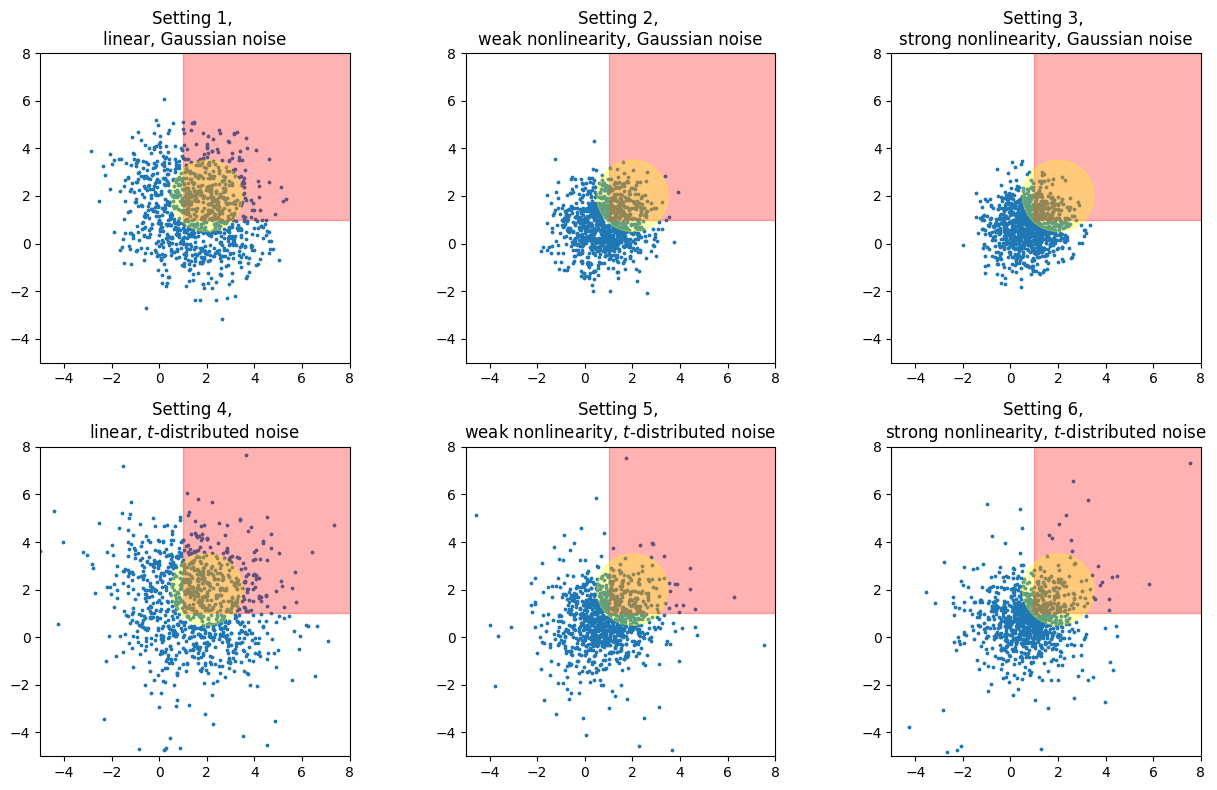

In [28]:
import matplotlib.pyplot as plt
from utility import boundary_map_convex, radius_map_convex, gen_data_kd

description = [
    "linear, Gaussian noise",
    "weak nonlinearity, Gaussian noise",
    "strong nonlinearity, Gaussian noise",
    r"linear, $t$-distributed noise",
    r"weak nonlinearity, $t$-distributed noise",
    r"strong nonlinearity, $t$-distributed noise",
]

fig, axs = plt.subplots(2, 3, figsize=(13, 8))
axs = axs.flatten()

for s in range(1, 7):
    Xtrain, Ytrain = gen_data_kd(s, 2, 1000, 0.5, 0.1, 10)
    ax = axs[s-1]
    bound = boundary_map_convex[2]
    ax.scatter(Ytrain[:, 0], Ytrain[:, 1], s=3)
    ax.fill([bound, bound, 10, 10], [bound, 10, 10, bound], color='red', alpha=0.3)

    circle = plt.Circle((2, 2), radius=radius_map_convex[2], color='yellow', alpha=0.3)
    ax.add_patch(circle)
    ax.set_aspect('equal')

    ax.set_xlim(-5, 8)
    ax.set_ylim(-5, 8)

    ax.set_title(f"Setting {s}, \n{description[s-1]}")

fig.tight_layout()
plt.savefig('hist.pdf', dpi=300)

##### Section 5.2

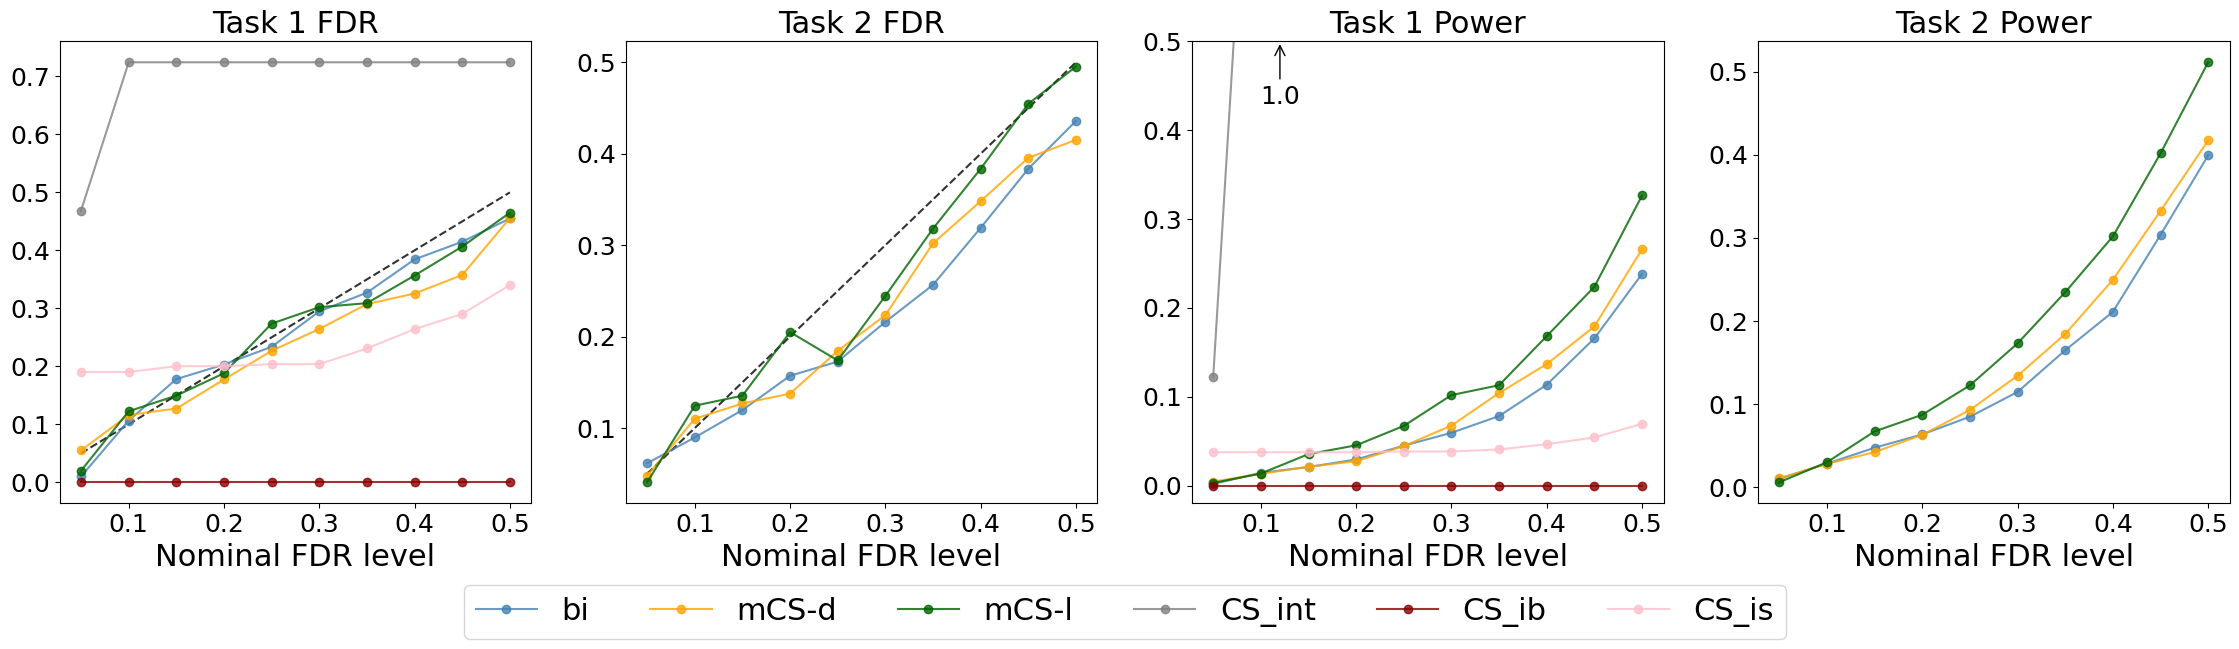

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns

ydim = 30
s = 3

nominal = np.round(np.linspace(0.05, 0.5, 10), 2)

df1 = pd.DataFrame()
for seed in range(1, 101, 10):
    tmp = pd.read_csv(f"dist_results\\varying_q\\MCS, setting={s}, shape=0, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain=1000, ncalib=1000, seed={seed}_{seed+9}.csv")
    df1 = pd.concat((df1, tmp))
df1 = df1.groupby(['model', 'q'], as_index=False).mean()

df1_dl = pd.DataFrame()
for seed in range(1, 101, 2):
    try:
        tmp = pd.read_csv(f"learn_results\\varying_q\\DL_s, setting={s}, shape=0, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain_f=800, ncalib=100, seed={seed}_{seed+1}.csv")
        df1_dl = pd.concat((df1_dl, tmp))
    except FileNotFoundError as e:
        print(e)
df1_dl = df1_dl.groupby(['model', 'q'], as_index=False).mean()

df2 = pd.DataFrame()
for seed in range(1, 101, 10):
    tmp = pd.read_csv(f"dist_results\\varying_q\\MCS, setting={s}, shape=0, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain=1000, ncalib=1000, seed={seed}_{seed+9}.csv")
    df2 = pd.concat((df2, tmp))
df2 = df2.groupby(['model', 'q'], as_index=False).mean()

################

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(28, 6))
axs = axs.flatten()

axs[0].plot(nominal, nominal, linestyle='--', color='black', alpha=0.8)
axs[0].plot(nominal, df1['Binary_FDP'], label='bi', marker='o', color='steelblue', alpha=0.8)
axs[0].plot(nominal, df1['MCS_FDP'], label='mCS-d', marker='o', color='orange', alpha=0.8)
axs[0].plot(nominal, df1_dl['DL_FDP'], label='mCS-l', marker='o', color='darkgreen', alpha=0.8)
axs[0].plot(nominal, df1['Intersect_FDP'], label='CS_int', marker='o', color='gray', alpha=0.8)
axs[0].plot(nominal, df1['Intersect_corr_FDP'], label='CS_ib', marker='o', color='darkred', alpha=0.8)
axs[0].plot(nominal, df1['Intersect_valid_FDP'], label='CS_is', marker='o', color='pink', alpha=0.8)
axs[0].set_xlabel('Nominal FDR level', fontsize=22)
axs[0].set_title('Task 1 FDR', fontsize=22)

axs[2].plot(nominal, df1['Binary_power'], marker='o', color='steelblue', alpha=0.8)
axs[2].plot(nominal, df1['MCS_power'], marker='o', color='orange', alpha=0.8)
axs[2].plot(nominal, df1_dl['DL_power'], marker='o', color='darkgreen', alpha=0.8)
axs[2].plot(nominal, df1['Intersect_power'], marker='o', color='gray', alpha=0.8)
axs[2].plot(nominal, df1['Intersect_corr_power'], marker='o', color='darkred', alpha=0.8)
axs[2].plot(nominal, df1['Intersect_valid_power'], marker='o', color='pink', alpha=0.8)
axs[2].set_xlabel('Nominal FDR level', fontsize=22)
axs[2].set_title('Task 1 Power', fontsize=22)

axs[2].set_ylim(-0.02, 0.5)

axs[2].annotate(
    "1.0",
    xy=(0.12, 0.5),  # Position of the arrowhead
    xytext=(0.12, 0.43),  # Position of the text
    arrowprops=dict(arrowstyle='->', facecolor="red"),
    ha="center",
    fontsize=18
)

################

df1 = pd.DataFrame()
for seed in range(1, 101, 10):
    tmp = pd.read_csv(f"dist_results\\varying_q\\MCS, setting={s}, shape=2, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain=1000, ncalib=1000, seed={seed}_{seed+9}.csv")
    df1 = pd.concat((df1, tmp))
df1 = df1.groupby(['model', 'q'], as_index=False).mean()

df1_dl = pd.DataFrame()
for seed in range(1, 101, 2):
    try:
        tmp = pd.read_csv(f"learn_results\\varying_q\\DL_s, setting={s}, shape=2, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain_f=800, ncalib=100, seed={seed}_{seed+1}.csv")
        df1_dl = pd.concat((df1_dl, tmp))
    except FileNotFoundError as e:
        print(e)
df1_dl = df1_dl.groupby(['model', 'q'], as_index=False).mean()

df2 = pd.DataFrame()
for seed in range(1, 101, 10):
    tmp = pd.read_csv(f"dist_results\\varying_q\\MCS, setting={s}, shape=2, xdim=10, ydim={ydim}, modelid=3, ntest=100, ntrain=1000, ncalib=1000, seed={seed}_{seed+9}.csv")
    df2 = pd.concat((df2, tmp))
df2 = df2.groupby(['model', 'q'], as_index=False).mean()

axs[1].plot(nominal, nominal, linestyle='--', color='black', alpha=0.8)
axs[1].plot(nominal, df1['Binary_FDP'], marker='o', color='steelblue', alpha=0.8)
axs[1].plot(nominal, df1['MCS_FDP'], marker='o', color='orange', alpha=0.8)
axs[1].plot(nominal, df1_dl['DL_FDP'], marker='o', color='darkgreen', alpha=0.8)
axs[1].set_xlabel('Nominal FDR level', fontsize=22)
axs[1].set_title('Task 2 FDR', fontsize=22)

axs[3].plot(nominal, df1['Binary_power'], marker='o', color='steelblue', alpha=0.8)
axs[3].plot(nominal, df1['MCS_power'], marker='o', color='orange', alpha=0.8)
axs[3].plot(nominal, df1_dl['DL_power'], marker='o', color='darkgreen', alpha=0.8)
axs[3].set_xlabel('Nominal FDR level', fontsize=22)
axs[3].set_title('Task 2 Power', fontsize=22)

for i in range(0, 4):
    axs[i].tick_params(axis='x', labelsize=18)
    axs[i].tick_params(axis='y', labelsize=18)


fig.legend(ncol=6, bbox_to_anchor=(0.747, 0), fontsize=22)

plt.show()
fig.savefig('varying_q.pdf', dpi=300, bbox_inches='tight', pad_inches=0.2)